# Name:Mohamed Elsayed Elsayed
# ID:20191615024


In [1]:
import numpy as np
import pandas as pd
RND=[24 ,35 ,65 ,81, 54 ,3 ,87 ,27, 73 ,70 ,47 ,45 ,48 ,17, 9, 42 ,87 ,26 ,36 ,40 ,7, 63, 19, 88 ,94]
RNl=[5 ,0 ,3 ,4 ,8]
begin=[0 for i in range(26)]
begin[0]=3
end=[0 for i in range(25)]
rnlead=[0 for i in range(26)]
short=[0 for i in range(25)]
short1=[0 for i in range(25)]
order=[0 for i in range(25)]
order[0]=8
lead=[-2 for i in range(26)]
lead[0]=1
order_quantity=[9,9,7,10,10]
i_quantity=0
days=list(range(1,26))
c=[1,2,3,4,5]
cycle=list(np.repeat(c,5))
demand=[]
order1=8

In [2]:
def rn_demand(rn):
    if rn>=1 and rn<=10:
        return 0
    elif rn>=11 and rn<=35:
        return 1 
    elif rn>=36 and rn<=70:
        return 2
    elif rn>=71 and rn<=91:
        return 3
    elif (rn>=92 and rn<=99 ) or rn==0:
        return 4
def rn_lead(rn):
    if rn>=1 and rn<=6:
        return 1
    elif rn>=7 and rn<=9:
        return 2 
    elif rn==0:
        return 3
for i in range(0,25):
    demand.append(rn_demand(RND[i]))

In [3]:
for i in range(25):
    if days[i]%5==0:
        order[i]=order_quantity[i_quantity]
        order1=order[i]
        lead[i]=rn_lead(RNl[i_quantity])
        rnlead[i]=RNl[i_quantity]
        i_quantity=i_quantity+1
    if lead[i]>=0 :
        lead[i+1]=lead[i]-1
    if lead[i]==-1:
        for j in range(0,(25)):
                order1=order1-short1[j]
                short1[j]=0
        begin[i]= begin[i]+order1
    if (begin[i]-demand[i])>=0:
        end[i]=abs(begin[i]-demand[i])
        begin[i+1]=end[i]
    if begin[i]-(demand[i])<0:
        end[i]=0
        short[i]=abs(begin[i]-demand[i])
        short1[i]=abs(begin[i]-demand[i])                

In [4]:
for i in range(0,25):
    if lead[i]==-2:
        lead[i]="-"
    if lead[i]==-1:
        lead[i]="-"
    if order[i]==0:
        order[i]="-"
    if rnlead[i]==0:
        rnlead[i]="-"

df={"cycle":cycle,"days":days,"begin":begin[0:25],"rn demand":RND,"demand":demand,"end":end,"short":short,"order ":order,"rn lead":rnlead[0:25],"lead":lead[0:25]}
        
df=pd.DataFrame(df)
df.index = np.arange(1, len(df)+1)



In [5]:
df

,cycle,days,begin,rn demand,demand,end,short,order,rn lead,lead
1,1,1,3,24,1,2,0,8,-,1
2,1,2,2,35,1,1,0,-,-,0
3,1,3,9,65,2,7,0,-,-,-
4,1,4,7,81,3,4,0,-,-,-
5,1,5,4,54,2,2,0,9,5,1
6,2,6,2,3,0,2,0,-,-,0
7,2,7,11,87,3,8,0,-,-,-
8,2,8,8,27,1,7,0,-,-,-
9,2,9,7,73,3,4,0,-,-,-
10,2,10,4,70,2,2,0,9,-,3


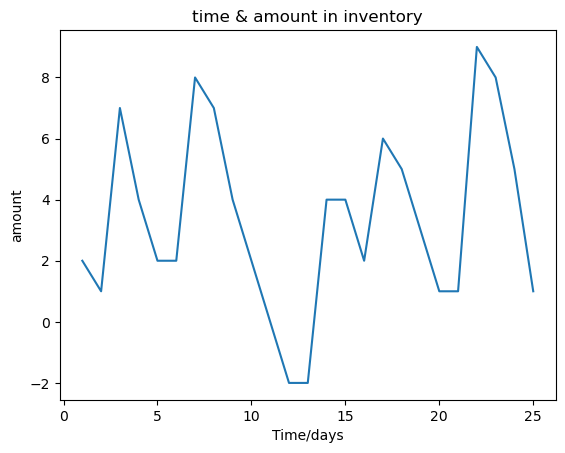

In [6]:
import matplotlib.pyplot as plt


# Define X and Y variable data
x = np.array(days)
y=np.array(end)-np.array(short)

plt.plot(x, y)
plt.xlabel("Time/days") # add X-axis label
plt.ylabel("amount") # add Y-axis label
plt.title("time & amount in inventory") # add title
plt.show()


In [7]:
print("number of shortage time",np.count_nonzero(np.array(short)))

number of shortage time 2


In [8]:
print("avg end invetory",sum(end)/days[len(days)-1])

avg end invetory 3.52
